In [1]:
import geojson
import geopandas as gpd
import contextily as ctx
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from descartes import PolygonPatch

In [2]:
#Weekend
dates = np.arange(0, 10001, 1).tolist()
ticks = np.arange(0, 24, 1).tolist()

df = pd.read_csv("peaks_it_wn.csv", parse_dates=dates, infer_datetime_format=True)

In [3]:
df.head()

Unnamed: 0                   0                   1                   2  \
0          0 2013-11-02 19:00:00 2013-11-02 19:00:00 2013-11-02 19:00:00   
1          1 2013-11-09 08:50:00 2013-11-09 08:50:00 2013-11-09 08:50:00   
2          2 2013-11-09 11:40:00 2013-11-09 11:40:00 2013-11-09 11:40:00   
3          3 2013-11-09 11:50:00 2013-11-09 11:50:00 2013-11-09 11:50:00   
4          4 2013-11-10 14:50:00 2013-11-10 14:50:00 2013-11-10 14:50:00   

                    3                   4                   5  \
0 2013-11-02 19:00:00 2013-11-02 19:00:00 2013-11-02 19:00:00   
1 2013-11-09 08:50:00 2013-11-09 08:50:00 2013-11-09 08:50:00   
2 2013-11-09 11:40:00 2013-11-09 11:40:00 2013-11-09 11:40:00   
3 2013-11-09 11:50:00 2013-11-09 11:50:00 2013-11-09 11:50:00   
4 2013-11-10 14:50:00 2013-11-10 14:50:00 2013-11-10 14:50:00   

                    6                   7                   8  ...  \
0 2013-11-02 19:00:00 2013-11-02 19:00:00 2013-11-02 19:00:00  ...   
1 2013-11-09 08:50:00 2013-11-09 08:50:00 2013-11-09 08:50:00  ...   
2 2013-11-09 11:40:00 2013-11-09 11:40:00 2013-11-09 11:40:00  ...   
3 2013-11-09 11:50:00 2013-11-09 11:50:00 2013-11-09 11:50:00  ...   
4 2013-11-10 14:50:00 2013-11-10 14:50:00 2013-11-10 14:50:00  ...   

                 9990                9991                9992  \
0 2013-11-03 11:10:00 2013-11-03 21:50:00 2013-11-09 20:30:00   
1 2013-11-09 14:30:00 2013-11-09 14:30:00 2013-11-01 13:00:00   
2 2013-11-09 12:00:00 2013-11-09 12:00:00 2013-11-02 17:10:00   
3 2013-11-02 12:10:00 2013-11-09 10:50:00 2013-11-09 12:30:00   
4 2013-11-09 14:50:00 2013-11-09 14:50:00 2013-11-03 18:50:00   

                 9993                9994                9995  \
0 2013-11-09 20:30:00 2013-11-09 17:30:00 2013-11-10 13:40:00   
1 2013-11-09 06:30:00 2013-11-09 06:30:00 2013-11-03 16:20:00   
2 2013-11-02 17:10:00 2013-11-09 11:40:00 2013-11-10 18:40:00   
3 2013-11-09 09:50:00 2013-11-09 11:30:00 2013-11-09 11:30:00   
4 2013-11-03 18:50:00 2013-11-03 18:50:00 2013-11-10 16:10:00   

                 9996                9997                9998  \
0 2013-11-10 13:40:00 2013-11-10 13:40:00 2013-11-10 18:10:00   
1 2013-11-09 06:30:00 2013-11-09 06:30:00 2013-11-09 06:30:00   
2 2013-11-09 11:00:00 2013-11-10 18:40:00 2013-11-01 12:10:00   
3 2013-11-09 09:40:00 2013-11-09 09:40:00 2013-11-09 11:30:00   
4 2013-11-09 14:10:00 2013-11-09 14:10:00 2013-11-01 11:40:00   

                 9999  
0 2013-11-10 18:10:00  
1 2013-11-09 10:10:00  
2 2013-11-01 12:00:00  
3 2013-11-01 11:10:00  
4 2013-11-02 17:10:00  

[5 rows x 10001 columns]

In [4]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
smsin=[]
for i in columns:
    if "Unnamed" in i:
        continue
    smsin.append(df[i][0].hour+df[i][0].minute/60)

In [5]:
gdf = gpd.read_file('./geojsons/milano-grid.geojson')
#gdf=gdf.to_crs('EPSG:3857')
#print(type(gdf))

with open("./geojsons/milano-grid.geojson") as json_file:
    json_data = geojson.load(json_file)

In [6]:
#Customize a Matplotlib cmap
jet = cm = plt.get_cmap('jet')

newcolors = jet(np.linspace(0, 1, 256))
home = np.array([91/256, 177/256, 242/256, 1])
newcolors[:78, :] = home

trans = np.array([91/256, 242/256, 146/256, 1])
newcolors[78:, :] = trans

work = np.array([226/256, 20/256, 61/256, 1])
newcolors[102:,:] = work

brek = np.array([240/256, 230/256, 132/256, 1])
newcolors[146:,:] = brek

work2 = np.array([239/256, 121/256, 148/256, 1])
newcolors[188:,:] = work2

leis = np.array([157/256, 20/256, 226/256, 1])
newcolors[212:,:] = leis

home2 = np.array([91/256, 177/256, 242/256, 1])
newcolors[245:,:] = home2

jet = ListedColormap(newcolors)

In [7]:
fig = plt.figure(dpi=240) 
ax = fig.gca() 

cNorm  = colors.Normalize(vmin=0, vmax=23)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())
c=[]
for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(smsin[i])
    json_data.features[i].properties = {
        "fill": colors.to_hex(colorVal, keep_alpha=True),
        "fill-opacity": 0.4,
        "stroke-width":1,
        "stroke-opacity": 0.5,
        "cellId": i+1
    }
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    c.append(colorVal)

ax.axis('scaled')
ax.set_title("Peak hour according to incoming sms - weekend")
#ax.set_axis_off()
fig.colorbar(scalarMap, ax=ax)

#plt.show()
ax.set_axis_off()
plt.close('all')
with open("./geojsons/milano-grid-smsin-weekend.geojson", "w") as json_file:
    geojson.dump(json_data, json_file)

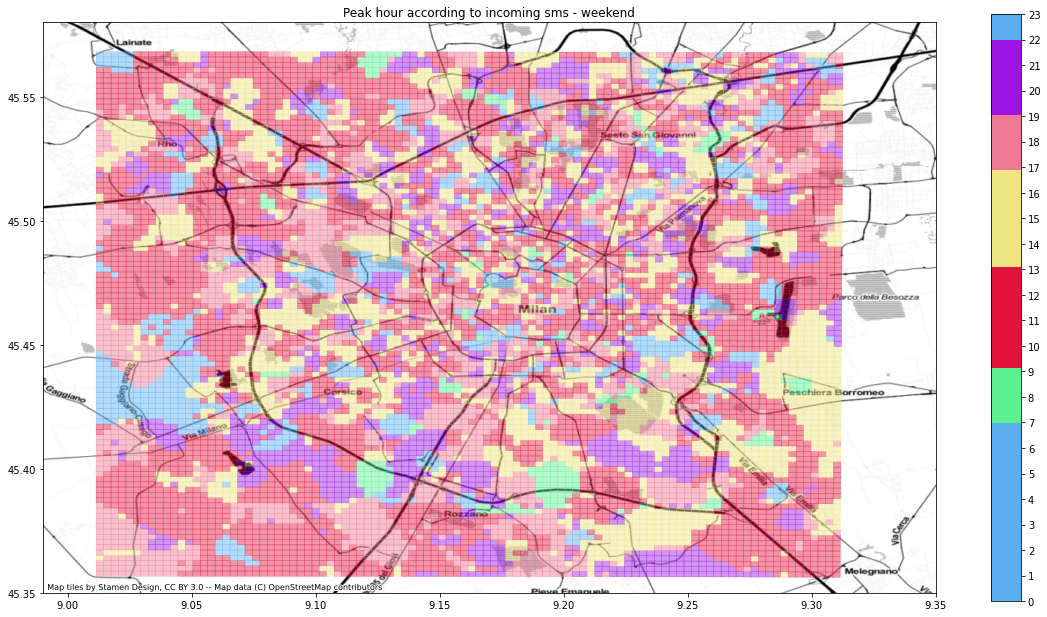

In [8]:

ax=gdf.plot(figsize=(20,12), edgecolor=c,facecolor=c, linewidth=0.5, alpha=0.45)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.Toner)#, source=ctx.providers.CartoDB.Voyager)
ax.axis('scaled')
ax.axis([8.99,9.35,45.35,45.58])
ax.set_aspect('equal')
ax.set_title("Peak hour according to incoming sms - weekend")
fig.colorbar(scalarMap, ax=ax, shrink=0.9, ticks=ticks)
plt.show()

In [9]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
smsout=[]
for i in columns:
    if "Unnamed" in i:
        continue
    smsout.append(df[i][1].hour+df[i][1].minute/60)
    

In [10]:

fig = plt.figure(dpi=240) 
ax = fig.gca() 

cNorm  = colors.Normalize(vmin=0, vmax=23)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())
co=[]
for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(smsout[i]) #0-9999
    json_data.features[i].properties = {
        "fill": colors.to_hex(colorVal, keep_alpha=True),
        "fill-opacity": 0.4,
        "stroke-width":1,
        "stroke-opacity": 0.5,
        "cellId": i+1
    }
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    co.append(colorVal)
    
ax.axis('scaled')
ax.set_title("Peak hour according to outgoing sms - weekend")
#ax.set_axis_off()
#fig.colorbar(scalarMap, ax=ax)

#plt.show()
ax.set_axis_off()
plt.close('all')
with open("./geojsons/milano-grid-smsout-weekend.geojson", "w") as json_file:
    geojson.dump(json_data, json_file)

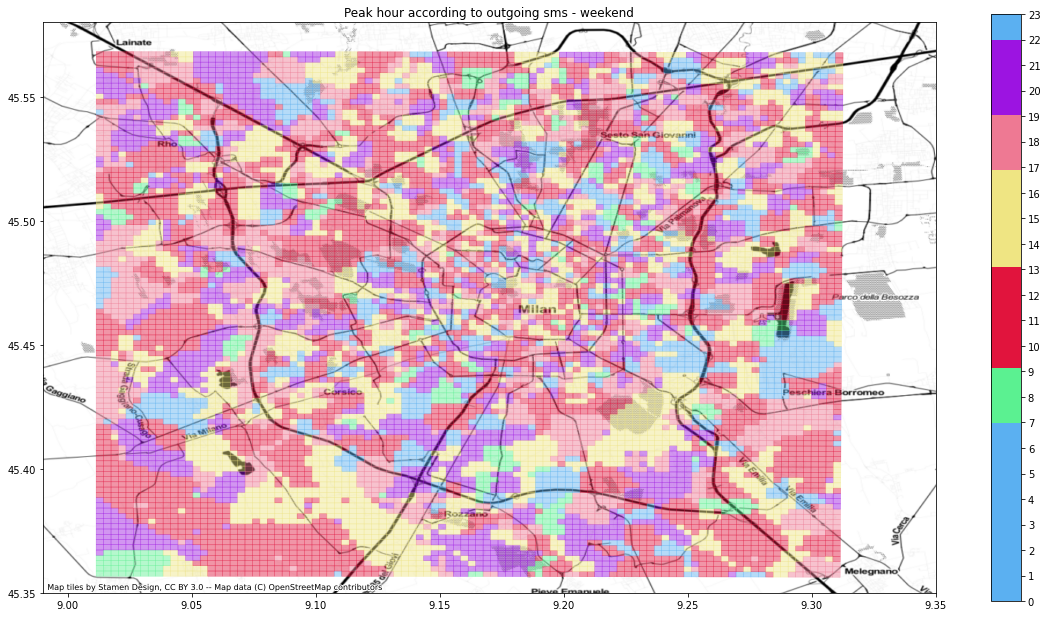

In [11]:
ax=gdf.plot(figsize=(20,12), edgecolor=co,facecolor=co, linewidth=0.5, alpha=0.45)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.Toner)#, source=ctx.providers.CartoDB.Voyager)
ax.axis('scaled')
ax.axis([8.99,9.35,45.35,45.58])
ax.set_aspect('equal')
ax.set_title("Peak hour according to outgoing sms - weekend")
fig.colorbar(scalarMap, ax=ax, shrink=0.9, ticks=ticks)
plt.show()

In [12]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
callin=[]
for i in columns:
    if "Unnamed" in i:
        continue
    callin.append(df[i][2].hour+df[i][2].minute/60)
    

In [13]:

fig = plt.figure(dpi=240) 
ax = fig.gca() 

cNorm  = colors.Normalize(vmin=0, vmax=23)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())
cc=[]
for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(callin[i]) #0-9999
    json_data.features[i].properties = {
        "fill": colors.to_hex(colorVal, keep_alpha=True),
        "fill-opacity": 0.4,
        "stroke-width":1,
        "stroke-opacity": 0.5,
        "cellId": i+1
    }
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    cc.append(colorVal)
    
ax.axis('scaled')
ax.set_title("Peak hour according to incoming calls - weekend")
#ax.set_axis_off()
#fig.colorbar(scalarMap, ax=ax)

#plt.show()
ax.set_axis_off()
plt.close('all')
with open("./geojsons/milano-grid-callin-weekend.geojson", "w") as json_file:
    geojson.dump(json_data, json_file)

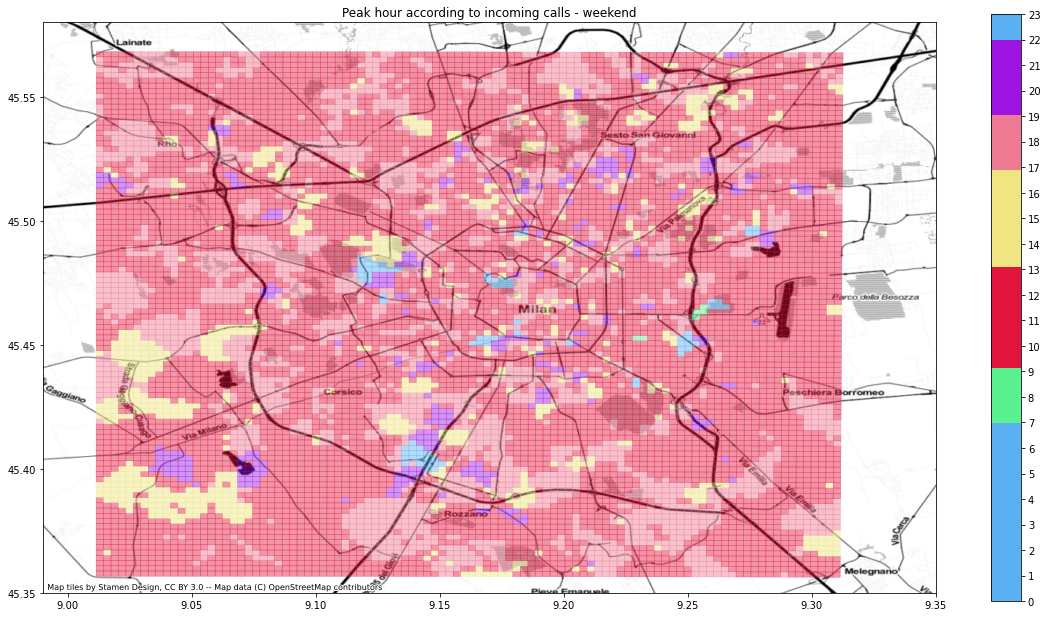

In [14]:
ax=gdf.plot(figsize=(20,12), edgecolor=cc,facecolor=cc, linewidth=0.5, alpha=0.45)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.Toner)#, source=ctx.providers.CartoDB.Voyager)
ax.axis('scaled')
ax.axis([8.99,9.35,45.35,45.58])
ax.set_aspect('equal')
ax.set_title("Peak hour according to incoming calls - weekend")
fig.colorbar(scalarMap, ax=ax, shrink=0.9, ticks=ticks)
plt.show()

In [15]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
callout=[]
for i in columns:
    if "Unnamed" in i:
        continue
    callout.append(df[i][3].hour+df[i][3].minute/60)


In [16]:

fig = plt.figure(dpi=240) 
ax = fig.gca() 

cNorm  = colors.Normalize(vmin=0, vmax=23)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
cco=[]

for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(callout[i]) #0-9999
    json_data.features[i].properties = {
        "fill": colors.to_hex(colorVal, keep_alpha=True),
        "fill-opacity": 0.4,
        "stroke-width":1,
        "stroke-opacity": 0.5,
        "cellId": i+1
    }
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    cco.append(colorVal)
    
ax.axis('scaled')
ax.set_title("Peak hour according to outgoing calls - weekend")
#ax.set_axis_off()
#fig.colorbar(scalarMap, ax=ax)

#plt.show()
ax.set_axis_off()
plt.close('all')
with open("./geojsons/milano-grid-callout-weekend.geojson", "w") as json_file:
    geojson.dump(json_data, json_file)

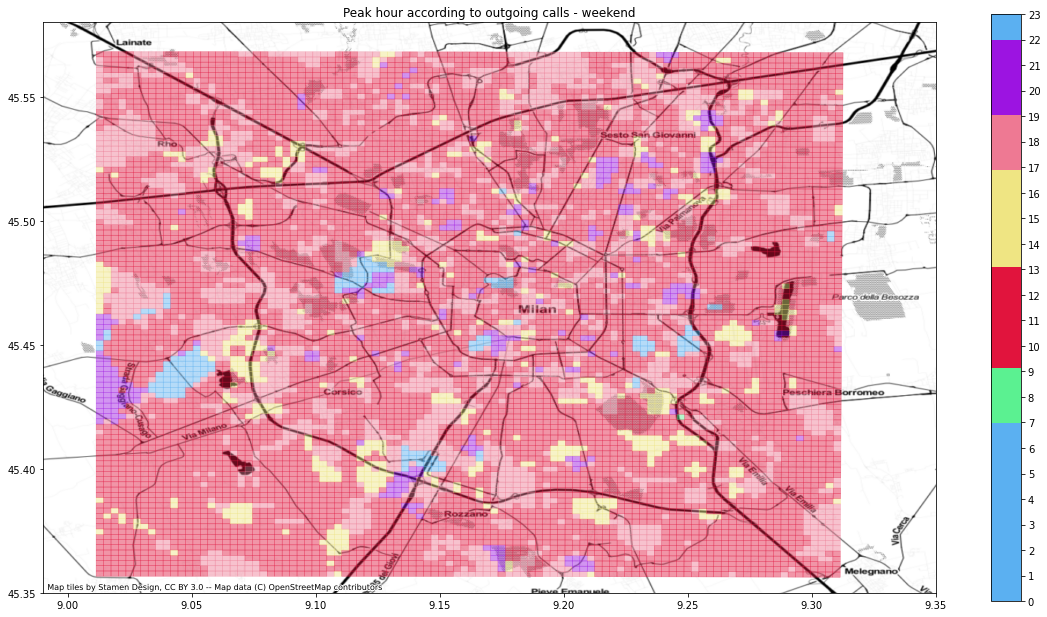

In [17]:
ax=gdf.plot(figsize=(20,12), edgecolor=cco,facecolor=cco, linewidth=0.5, alpha=0.45)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.Toner)#, source=ctx.providers.CartoDB.Voyager)
ax.axis('scaled')
ax.axis([8.99,9.35,45.35,45.58])
ax.set_aspect('equal')
ax.set_title("Peak hour according to outgoing calls - weekend")
fig.colorbar(scalarMap, ax=ax, shrink=0.9, ticks=ticks)
plt.show()

In [18]:
columns = list(df)

#smsin = [0]   callin = [2]
#smsout = [1]  callout = [3]
#internet = [4]
internet=[]
for i in columns:
    if "Unnamed" in i:
        continue
    internet.append(df[i][4].hour+df[i][4].minute/60)


In [19]:

fig = plt.figure(dpi=240) 
ax = fig.gca() 

cNorm  = colors.Normalize(vmin=0, vmax=23)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())
it=[]
for i in range(0,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(internet[i]) #0-9999
    json_data.features[i].properties = {
        "fill": colors.to_hex(colorVal, keep_alpha=True),
        "fill-opacity": 0.4,
        "stroke-width":1,
        "stroke-opacity": 0.5,
        "cellId": i+1
    }
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=0.5, zorder=2 ))
    it.append(colorVal)
    
ax.axis('scaled')
ax.set_title("Peak hour according to internet traffic - weekend")
#ax.set_axis_off()
#fig.colorbar(scalarMap, ax=ax)

#plt.show()
ax.set_axis_off()
plt.close('all')
with open("./geojsons/milano-grid-intnt-weekend.geojson", "w") as json_file:
    geojson.dump(json_data, json_file)

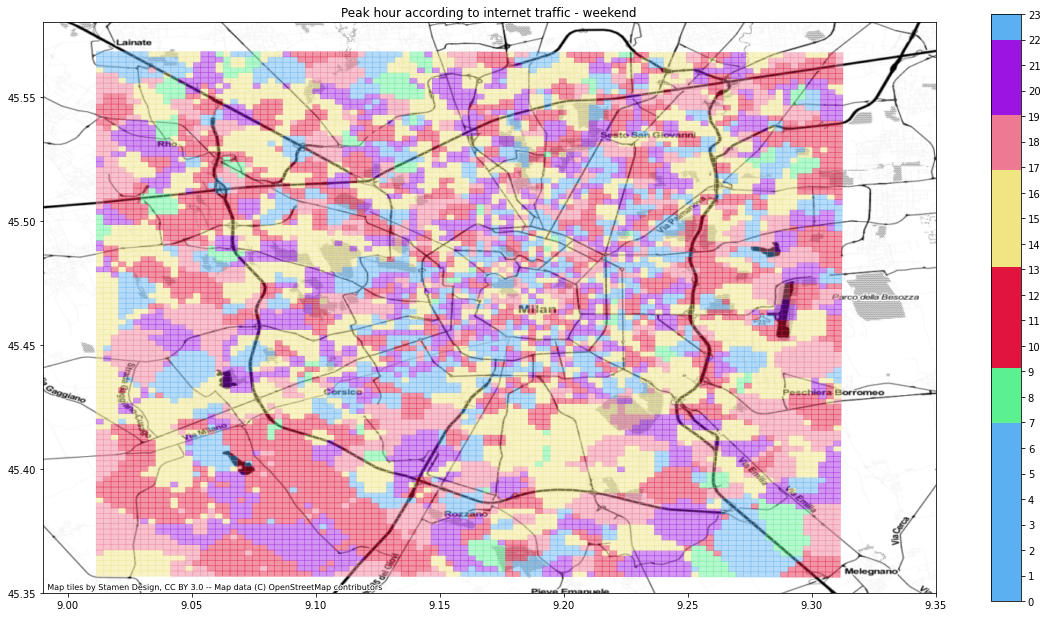

In [20]:
ax=gdf.plot(figsize=(20,12), edgecolor=it,facecolor=it, linewidth=0.5, alpha=0.45)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.Toner)#, source=ctx.providers.CartoDB.Voyager)
ax.axis('scaled')
ax.axis([8.99,9.35,45.35,45.58])
ax.set_aspect('equal')
ax.set_title("Peak hour according to internet traffic - weekend")
fig.colorbar(scalarMap, ax=ax, shrink=0.9, ticks=ticks)
plt.show()